In [2]:
import textblob

In [3]:
import pandas as pd
path = '../MLtext2/MLtext2/data/yelp.csv'
yelp = pd.read_csv(path)

In [4]:
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [6]:
yelp_best_worst = yelp[(yelp.stars==5)|(yelp.stars==1)]
yelp_best_worst.shape

(4086, 10)

In [7]:
X = yelp_best_worst.text
y = yelp_best_worst.stars

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

def tokenize_test(vect):
    
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    print('Features: ', X_train_dtm.shape[1])
    
    nb = MultinomialNB()
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

Part 2: Term Frequency-Inverse Document Frequency

In [10]:
simple_train = ['call you tonight', 'Call me a cab', 'please call me...PLEASE!']

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

In [12]:
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [13]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [15]:
vect = CountVectorizer(binary=True)
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,1,0,0


In [16]:
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1,6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [17]:
tf/df

,cab,call,me,please,tonight,you
0,0.0,0.333333,0.0,0.0,1.0,1.0
1,1.0,0.333333,0.5,0.0,0.0,0.0
2,0.0,0.333333,0.5,2.0,0.0,0.0


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [19]:
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000,0.385372,0.000000,0.000000,0.652491,0.652491
1,0.720333,0.425441,0.547832,0.000000,0.000000,0.000000
2,0.000000,0.266075,0.342620,0.901008,0.000000,0.000000


In [24]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


In [25]:
vect = TfidfVectorizer()
tokenize_test(vect)

Features:  16825
Accuracy:  0.8199608610567515


In [26]:
vect = TfidfVectorizer(norm=None)
tokenize_test(vect)

Features:  16825
Accuracy:  0.9080234833659491


In [27]:
#does same thing as CountVectorizer
vect = TfidfVectorizer(norm=None, use_idf=False)
tokenize_test(vect)

Features:  16825
Accuracy:  0.9187866927592955


Part 3: Using TF-IDF to summarize documents

In [28]:
vect = TfidfVectorizer(stop_words='english')
dtm = vect.fit_transform(yelp.text)
dtm.shape

(10000, 28880)

In [32]:
features = vect.get_feature_names()
len(features)

28880

Part 4: Sentiment analysis using TextBlob

In [33]:
print(yelp_best_worst.loc[0, 'text'])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [34]:
from textblob import TextBlob
review = TextBlob(yelp_best_worst.loc[0, 'text'])

In [35]:
review.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [36]:
review.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [37]:
print(review.sentiment.polarity)
print(review.sentiment.subjectivity)

0.40246913580246907
0.6591122868900646


In [38]:
yelp['length'] = yelp.text.apply(len)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345


In [42]:
def detect_sentiment(text):
    
    blob = TextBlob(text)
    
    return blob.sentiment.polarity
    

In [43]:
yelp['sentiment']=yelp.text.apply(detect_sentiment)
yelp.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length,sentiment
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889,0.402469
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345,0.229773


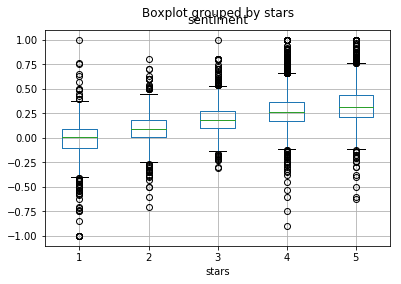

In [44]:
%matplotlib inline
yelp.boxplot('sentiment', by='stars')

In [45]:
yelp.loc[yelp.sentiment == 1, 'text'].head()

254    Our server Gary was awesome. Food was amazing....
347    3 syllables for this place. \nA-MAZ-ING!\n\nTh...
420                                    LOVE the food!!!!
459    Love it!!! Wish we still lived in Arizona as C...
679                                     Excellent burger
Name: text, dtype: object

In [46]:
yelp.loc[yelp.sentiment == -1, 'text'].head()

773     This was absolutely horrible. I got the suprem...
1517                  Nasty workers and over priced trash
3266    Absolutely awful... these guys have NO idea wh...
4766                                       Very bad food!
5812        I wouldn't send my worst enemy to this place.
Name: text, dtype: object

In [47]:
pd.set_option('max_colwidth', 500)

In [48]:
yelp.loc[(yelp.stars==1)&(yelp.sentiment>0.5), 'text'].head(1)

1781    If you like the stuck up Scottsdale vibe this is a good place for you. The food isn't impressive. Nice outdoor seating.
Name: text, dtype: object

In [49]:
yelp.loc[(yelp.stars==5)&(yelp.sentiment<-0.3), 'text'].head(1)

390    RIP AZ Coffee Connection.  :(  I stopped by two days ago unaware that they had closed.  I am severely bummed.  This place is irreplaceable!  Damn you, Starbucks and McDonalds!
Name: text, dtype: object

In [50]:
pd.reset_option('max_colwidth')

Regular expressions

In [69]:
import re

In [70]:
s = 'my 1st string!!'

Here are two ways to write your regular expressions:

In [71]:
re.search(r'..t', s).group()

'1st'

In [72]:
match = re.search(r'..t',s)
if match:
    print(match.group())

1st


Exercise 1: Baltimore homicides

In [73]:
with open('../MLtext2/MLtext2/data/homicides.txt') as f:
    data = [row for row in f]

In [75]:
len(data)

1250

In [76]:
data[:5]

['39.311024, -76.674227, iconHomicideShooting, \'p2\', \'<dl><dt>Leon Nelson</dt><dd class="address">3400 Clifton Ave.<br />Baltimore, MD 21216</dd><dd>black male, 17 years old</dd><dd>Found on January 1, 2007</dd><dd>Victim died at Shock Trauma</dd><dd>Cause: shooting</dd></dl>\'\n',
 '39.312641, -76.698948, iconHomicideShooting, \'p3\', \'<dl><dt>Eddie Golf</dt><dd class="address">4900 Challedon Road<br />Baltimore, MD 21207</dd><dd>black male, 26 years old</dd><dd>Found on January 2, 2007</dd><dd>Victim died at scene</dd><dd>Cause: shooting</dd></dl>\'\n',
 '39.309781, -76.649882, iconHomicideBluntForce, \'p4\', \'<dl><dt>Nelsene Burnette</dt><dd class="address">2000 West North Ave<br />Baltimore, MD 21217</dd><dd>black female, 44 years old</dd><dd>Found on January 2, 2007</dd><dd>Victim died at scene</dd><dd>Cause: blunt force</dd></dl>\'\n',
 '39.363925, -76.598772, iconHomicideAsphyxiation, \'p5\', \'<dl><dt>Thomas MacKenney</dt><dd class="address">5900 Northwood Drive<br />Balti

In [77]:
import re

In [96]:
ages = []
for row in data:
    match = re.search(r'\d+ years? old', row)
    if match:
        ages.append(match.group())
    else:
        ages.append('0 years old')

In [97]:
len(ages)

1250

In [98]:
print(ages[:5])

['17 years old', '26 years old', '44 years old', '21 years old', '61 years old']


In [99]:
ages_nums = []
for age in ages:
    match = re.search(r'\d+', age)
    if match:
        ages_nums.append(int(match.group()))
    else:
        print('error')

In [103]:
print(len(ages_nums))
print(ages_nums[:100])

1250
[17, 26, 44, 21, 61, 46, 27, 21, 16, 21, 34, 25, 23, 30, 26, 36, 21, 27, 30, 19, 31, 34, 24, 31, 33, 24, 25, 22, 23, 52, 34, 32, 26, 39, 28, 29, 19, 37, 22, 27, 32, 18, 21, 25, 17, 19, 20, 28, 17, 37, 36, 40, 48, 19, 17, 18, 27, 49, 65, 21, 30, 19, 54, 17, 39, 18, 17, 16, 23, 23, 21, 21, 39, 25, 20, 16, 45, 25, 23, 45, 29, 23, 18, 25, 35, 30, 36, 22, 16, 24, 31, 18, 31, 0, 23, 23, 24, 25, 23, 26]


In [104]:
total = 0
counter = 0
for age in ages_nums:
    if age != 0:
        total += age
        counter += 1
average = total/counter

In [105]:
print(average)

29.919289749798224


In [109]:
re.search(r'(\d)(..)', s).group(1)

'1'

In [110]:
re.search(r'(\d)(..)',s).group(2)

'st'

In [112]:
re.search(r'(\d)(..)',s).group(0)

'1st'

In [114]:
ages2 = []
for row in data:
    match = re.search(r'(\d+) years? old', row)
    if match:
        ages2.append(int(match.group(1)))
    else:
        ages2.append(0)
        
print(len(ages2))

1250
